# Optimization with the Clonal Selection Algorithm (CLONALG)

## 1. Introduction

### Knapsack Problem Example

In this notebook, apply ClonAlg to the Knapsack Problem using optimization algorithms from the AISP package.

The problem involves choosing items with values and weights to maximize the total value without exceeding the knapsack's capacity.

## 2. Configuration

### Installation of the necessary libraries.

In [ ]:
%pip install matplotlib
%pip install aisp

### Importing the necessary libraries

In [1]:
# Importing the Clonal Selection Algorithm (CLONALG)
from aisp.csa import Clonalg

# Libraries for data manipulation and numerical calculations
import numpy as np
from itertools import product

# Data visualization
import matplotlib.pyplot as plt

## 3. Problem Definition

Create 20 items, each with a weight and a value, considering a backpack with a capacity of 435, and define the ``knapsack_fitness`` function, which will be passed to **Clonalg** to evaluate the affinity of the antibodies.

In [2]:
rng = np.random.default_rng(1234)

n_items = 20
weights = rng.integers(10, 101, size=n_items).tolist()
values = rng.integers(100, 501, size=n_items).tolist()

capacity = 435

# Fitness function
def knapsack_fitness(solution):
    total_weight = np.sum(weights * solution)
    total_value = np.sum(values * solution)
    
    # If capacity is exceeded, penalty will be applied
    if total_weight > capacity:
        excess = total_weight - capacity
        penalty = -excess * np.max(values) * 2
        return total_value + penalty
    
    return total_value

print("Weights:", weights)
print("Values:", values)
print("Capacity:", capacity)

Weights: [99, 98, 99, 44, 25, 94, 19, 33, 22, 39, 58, 20, 82, 32, 81, 38, 82, 97, 97, 33]
Values: [322, 276, 202, 344, 459, 446, 359, 446, 307, 370, 482, 364, 118, 395, 396, 189, 447, 168, 416, 449]
Capacity: 435


## 4. Algorithm configuration

In [3]:
# Instantiate ClonAlg for binary problems
clonalg = Clonalg(
    problem_size=n_items,
    N=100,
    selection_size=15,
    rate_clonal=30,
    rate_hypermutation=3,
    n_diversity_injection=20,
    feature_type='binary-features',
    seed=1234,
    mode="max"
)

clonalg.register('affinity_function', knapsack_fitness)

## 5. Running the optimization

In [4]:
clonalg.optimize(100, 5)

if clonalg.best_cost is not None:
	print('Best cost:', abs(clonalg.best_cost))


┌───────────┬─────────────────────────┬────────────────────┬─────────────────┐
│ Iteration │   Best Affinity (max)   │   Worse Affinity   │   Stagnation    │
├───────────┼─────────────────────────┼────────────────────┼─────────────────┤
│     1     │              3187.000000│      -396046.000000│        0        │
│     2     │              3633.000000│      -315758.000000│        0        │
│     3     │              4134.000000│      -129499.000000│        0        │
│     4     │              4210.000000│      -194613.000000│        0        │
│     5     │              4210.000000│       -21193.000000│        1        │
│     6     │              4210.000000│      -556395.000000│        2        │
│     7     │              4391.000000│      -262486.000000│        0        │
│     8     │              4391.000000│      -318309.000000│        1        │
│     9     │              4421.000000│       -53687.000000│        0        │
│    10     │              4421.000000│       -5282

## 6. Result

In [5]:
print(clonalg.get_report())


            Optimization Summary             
Best cost      : 4422
Best solution  : [False False False  True  True False  True  True  True  True  True  True
 False  True False False  True False False  True]
Cost History per Iteration:

┌────────────┬────────────────────────────┐
│ Iteration  │            Cost            │
├────────────┼────────────────────────────┤
│          1 │                3187.000000 │
│          2 │                3633.000000 │
│          3 │                4134.000000 │
│          4 │                4210.000000 │
│          5 │                4210.000000 │
│          6 │                4210.000000 │
│          7 │                4391.000000 │
│          8 │                4391.000000 │
│          9 │                4421.000000 │
│         10 │                4421.000000 │
│         11 │                4421.000000 │
│         12 │                4422.000000 │
│         13 │                4422.000000 │
│         14 │                4422.000000 │
│         15 │

### 6.1 Evolução do melhor ao longo das gerações

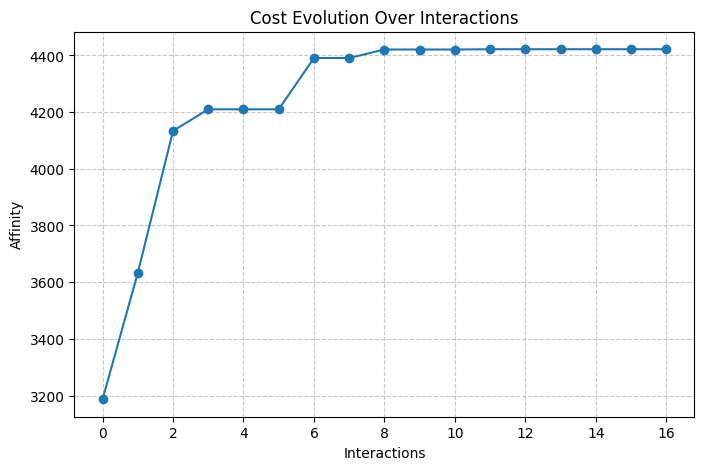

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(clonalg.cost_history, marker='o')
plt.title('Cost Evolution Over Interactions')
plt.xlabel('Interactions')
plt.ylabel('Affinity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 6.2 Comparison with Brute Force

The following code implements a brute force approach. It works by testing all possible combinations of adding or deleting items from the backpack.

In [7]:
best_value = 0
best_solution = None

for solution in product([0,1], repeat=n_items):
    solution = np.array(solution)
    total_weight = np.sum(solution * weights)
    total_value  = np.sum(solution * values)
    
    if total_weight <= capacity and total_value > best_value:
        best_value = total_value
        best_solution = solution

chosen_items = np.where(best_solution == 1)[0].tolist()
raw_items_qty = len(chosen_items)
raw_weight = np.dot(best_solution, weights) # type: ignore

# ==== Clonalg Solution ====
clonalg_solution = np.array(clonalg.best_solution, dtype=int)
clonalg_items = np.where(clonalg_solution == 1)[0].tolist()
clonalg_items_qty = len(clonalg_items)
clonalg_weight = np.dot(clonalg_solution, weights)

# ==== Printing the results ====
print("\n===== RESULTS =====\n")
print("Brute Force")
print(f"- Items chosen: {chosen_items}")
print(f"- Quantity of items: {raw_items_qty}")
print(f"- Total value: {best_value}")
print(f"- Total weight: {raw_weight}")

print("\nClonalg")
print(f"- Items chosen: {clonalg_items}")
print(f"- Quantity of items: {clonalg_items_qty}")
print(f"- Total value: {clonalg.best_cost}")
print(f"- Total weight: {clonalg_weight}")


===== RESULTS =====

Brute Force
- Items chosen: [3, 4, 6, 7, 8, 9, 10, 11, 13, 16, 19]
- Quantity of items: 11
- Total value: 4422
- Total weight: 407

Clonalg
- Items chosen: [3, 4, 6, 7, 8, 9, 10, 11, 13, 16, 19]
- Quantity of items: 11
- Total value: 4422
- Total weight: 407
